In [6]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# To display plots inside Jupyter Notebook
%matplotlib inline

# Optional: Improve plot style
sns.set(style="whitegrid")


In [7]:

file_path = "netflix_titles.csv"  # Make sure this file is in the same folder as your notebook

# Check if file exists before loading
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
    print("Shape of dataset:", df.shape)
else:
    print("❌ File not found! Please check the file name or path.")

✅ Dataset loaded successfully!
Shape of dataset: (8807, 12)


In [8]:
# Step 3: Basic Exploration

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing Values in Each Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
dura

In [11]:
# Step 4: Data Cleaning (Fixed Version - No FutureWarnings)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing values (safe method without chained assignment warning)
df = df.fillna({
    'country': 'Unknown',
    'director': 'Unknown',
    'cast': 'Unknown'
})

# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("✅ Data cleaned successfully (no warnings).")


✅ Data cleaned successfully (no warnings).


In [12]:
# Step 5: Summary Statistics
print("Summary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
count,8807,8807,8807,8807,8807,8807,8709,8807.000000,8803,8804,8807,8807,8709.000000,8709.000000
unique,8807,2,8807,4529,7693,749,NaN,NaN,17,220,514,8775,NaN,NaN
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN,NaN
freq,1,6131,1,2634,825,2818,NaN,NaN,3207,1793,362,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2014.180198,NaN,NaN,NaN,NaN,2018.887932,6.653347
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,2008.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-20 00:00:00,2013.000000,NaN,NaN,NaN,NaN,2018.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12 00:00:00,2017.000000,NaN,NaN,NaN,NaN,2019.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00,2019.000000,NaN,NaN,NaN,NaN,2020.000000,10.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.000000,12.000000


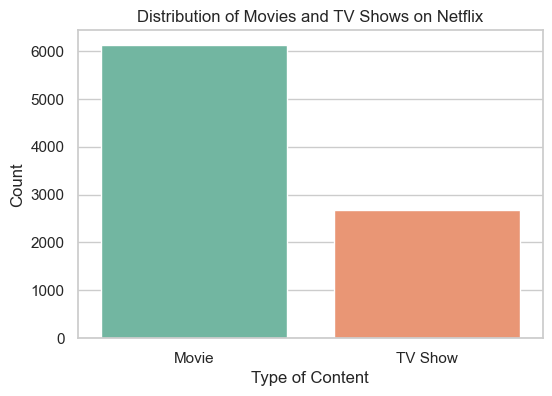

In [14]:
# Step 6: Content Type Distribution (Fixed for Seaborn v0.13+)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()


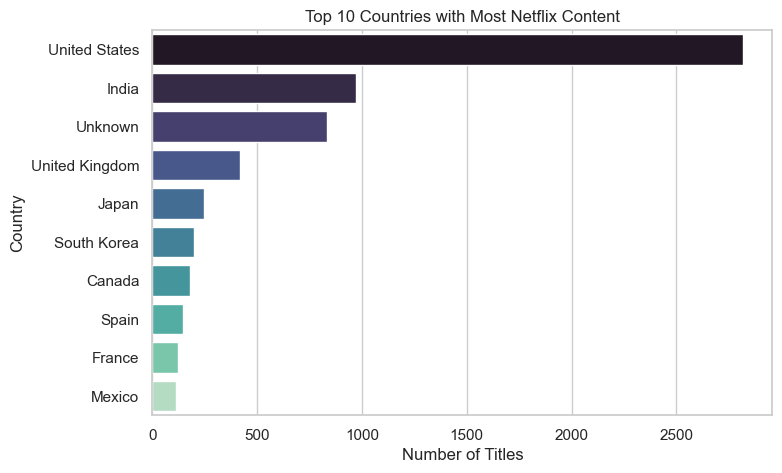

In [16]:
# Step 7: Top 10 Countries with Most Netflix Content (Fixed for Seaborn v0.13+)

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette='mako',
    legend=False
)
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


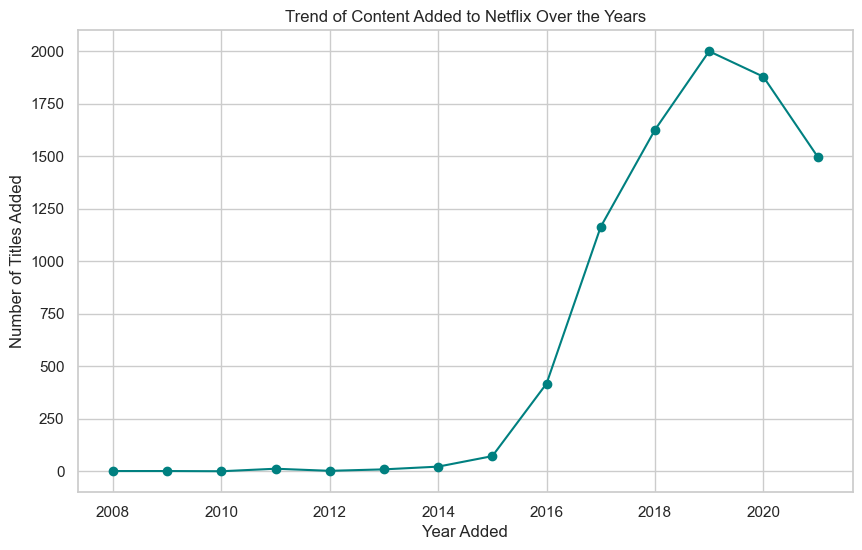

In [17]:
# Step 8: Trend of Content Added Over Years
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title("Trend of Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


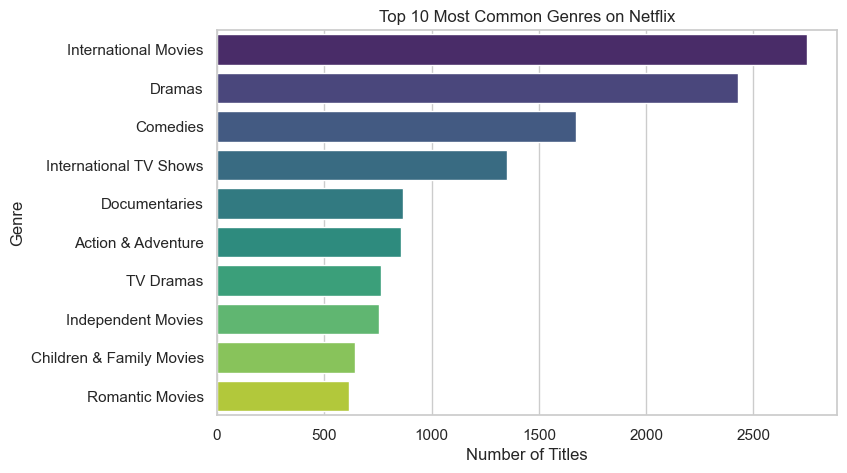

In [19]:
# Step 9: Most Common Genres (Fixed for Seaborn v0.13+)

all_genres = df['listed_in'].dropna().str.split(', ')
genres = []
for sublist in all_genres:
    genres.extend(sublist)

genre_count = pd.Series(genres).value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=genre_count.values,
    y=genre_count.index,
    hue=genre_count.index,
    palette='viridis',
    legend=False
)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


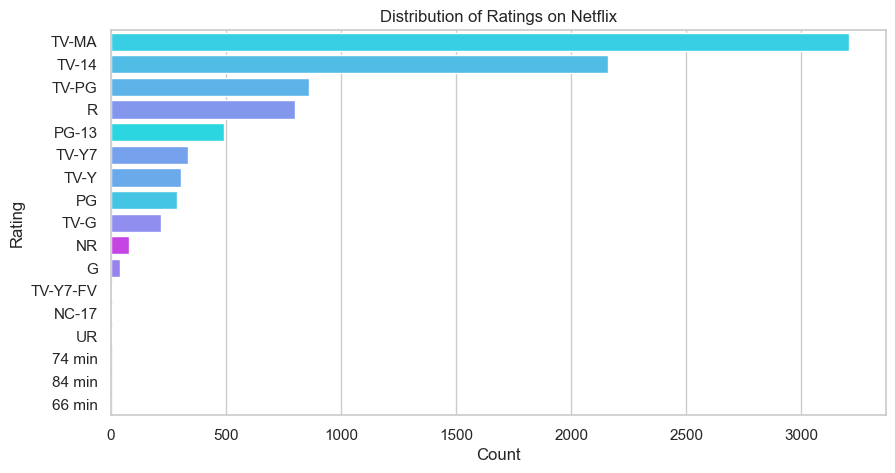

In [21]:
# Step 10: Ratings Distribution (Fixed for Seaborn v0.13+)

plt.figure(figsize=(10,5))
sns.countplot(
    y='rating',
    data=df,
    hue='rating',              # tell seaborn which variable to color
    order=df['rating'].value_counts().index,
    palette='cool',
    legend=False               # hide duplicate legend
)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


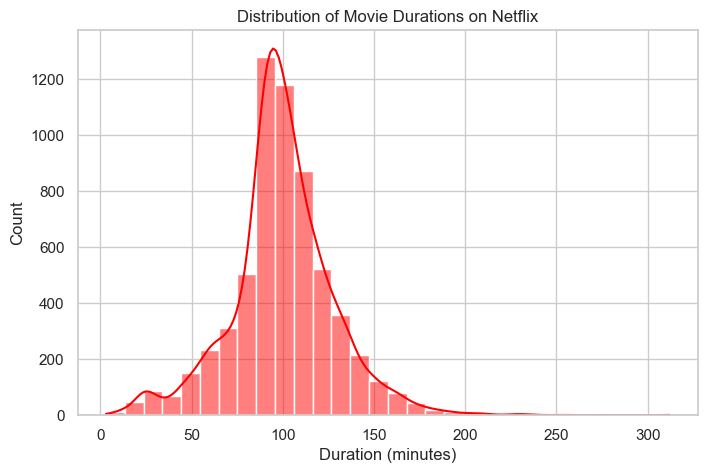

In [22]:
# Step 11: Duration Analysis (Movies Only)
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_num'] = movie_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(movie_df['duration_num'], bins=30, kde=True, color='red')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


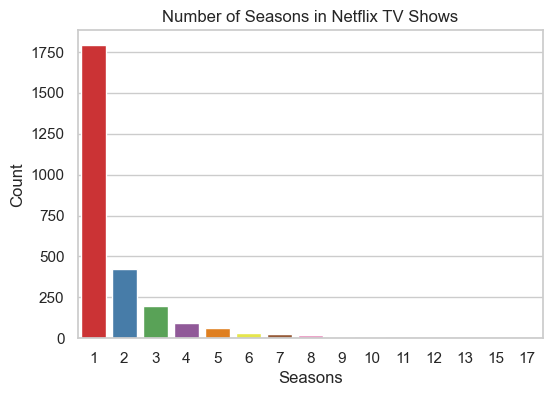

In [24]:
# Step 12: TV Show Seasons Distribution (Fixed for Seaborn v0.13+ / 0.14+)

tv_df = df[df['type'] == 'TV Show'].copy()

# Clean the 'duration' column and convert to numeric
tv_df['seasons_num'] = (
    tv_df['duration']
    .str.replace(' Season', '', regex=False)
    .str.replace('s', '', regex=False)
    .astype(int)
)

plt.figure(figsize=(6,4))
sns.countplot(
    x='seasons_num',
    data=tv_df,
    hue='seasons_num',   # specify hue to use the palette safely
    palette='Set1',
    legend=False          # remove redundant legend
)
plt.title("Number of Seasons in Netflix TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()



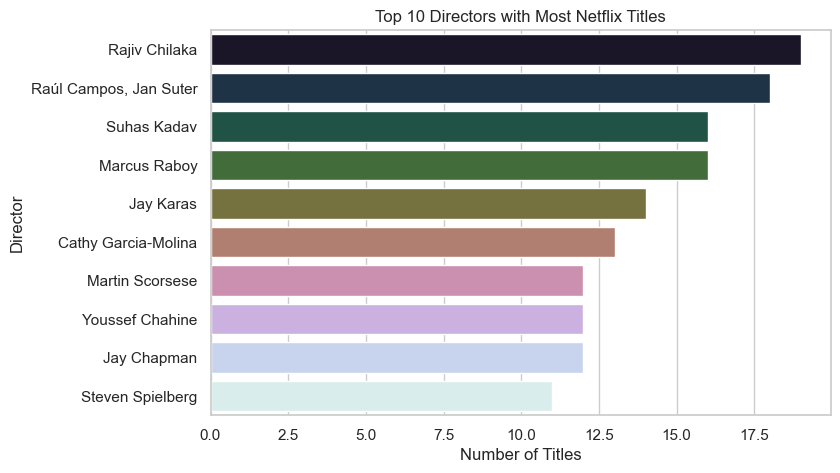

In [26]:
# Step 13: Top 10 Directors with Most Netflix Titles (Fixed for Seaborn v0.13+ / 0.14+)

top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,     # specify hue to use the palette safely
    palette='cubehelix',
    legend=False                 # hide redundant legend
)
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()



* KEY INSIGHTS FROM NETFLIX DATASET:*

1.Netflix has more movies than TV shows.

️2.The USA and India contribute the most content.

3.️The number of titles added increased rapidly after 2015.

4.Most common genres include Dramas, Comedies, and Documentaries.

5.'TV-MA' and 'TV-14' are the most common ratings.

6 .Most movies are between 80–120 minutes long.

7.The majority of TV shows have only 1 season.
